In [31]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os

In [2]:
img_size=(224,224)
batch=16
epoch=5

In [7]:
!unzip images.zip

Archive:  images.zip
   creating: Images/
   creating: Images/train/
   creating: Images/train/normal/
  inflating: Images/train/normal/IM-0117-0001.jpeg  
  inflating: Images/train/normal/IM-0128-0001.jpeg  
  inflating: Images/train/normal/IM-0141-0001.jpeg  
  inflating: Images/train/normal/IM-0160-0001.jpeg  
  inflating: Images/train/normal/IM-0213-0001.jpeg  
  inflating: Images/train/normal/IM-0216-0001.jpeg  
  inflating: Images/train/normal/IM-0223-0001.jpeg  
  inflating: Images/train/normal/IM-0227-0001.jpeg  
  inflating: Images/train/normal/IM-0256-0001.jpeg  
  inflating: Images/train/normal/IM-0265-0001.jpeg  
  inflating: Images/train/normal/IM-0269-0001.jpeg  
  inflating: Images/train/normal/IM-0291-0001.jpeg  
  inflating: Images/train/normal/IM-0308-0001.jpeg  
  inflating: Images/train/normal/IM-0314-0001.jpeg  
  inflating: Images/train/normal/IM-0323-0001.jpeg  
  inflating: Images/train/normal/IM-0327-0001.jpeg  
  inflating: Images/train/normal/IM-0347-0001.jpe

In [13]:
data_dir="/content/Images"

In [14]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

In [15]:
val_datagen=ImageDataGenerator(
    rescale=1./255
)

In [18]:
train_gen=train_datagen.flow_from_directory(
    os.path.join(data_dir,"train"),
    target_size=img_size,
    batch_size=batch,
    class_mode="binary"
)


Found 300 images belonging to 2 classes.


In [19]:
val_gen=val_datagen.flow_from_directory(
    os.path.join(data_dir,"val"),
    target_size=img_size,
    batch_size=batch,
    class_mode="binary"
)


Found 16 images belonging to 2 classes.


In [21]:
model=MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [22]:
 model.trainable=False

In [26]:
x=model.output
x=GlobalAveragePooling2D()(x)
Dense(128,activation='relu')(x)
x=Dropout(0.3)(x)
output=Dense(1,activation='sigmoid')(x)

In [33]:
model1 = Model(inputs=model.input, outputs=output)

In [34]:
model1.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [35]:
model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [36]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "pneumonia_cnn_model.h5",
    monitor="val_accuracy",
    save_best_only=True
)

In [37]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epoch,
    callbacks=[early_stop, checkpoint]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.5228 - loss: 0.8547

19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5250 - loss: 0.8495 - val_accuracy: 0.7500 - val_loss: 0.5477
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.7700 - loss: 0.5111

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - accuracy: 0.7708 - loss: 0.5088 - val_accuracy: 0.8125 - val_loss: 0.4247
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.8136 - loss: 0.4020 - val_accuracy: 0.7500 - val_loss: 0.3991
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.9090 - loss: 0.2810

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step - accuracy: 0.9093 - loss: 0.2798 - val_accuracy: 0.8750 - val_loss: 0.3485
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 327ms/step - accuracy: 0.8880 - loss: 0.2829 - val_accuracy: 0.8750 - val_loss: 0.3408


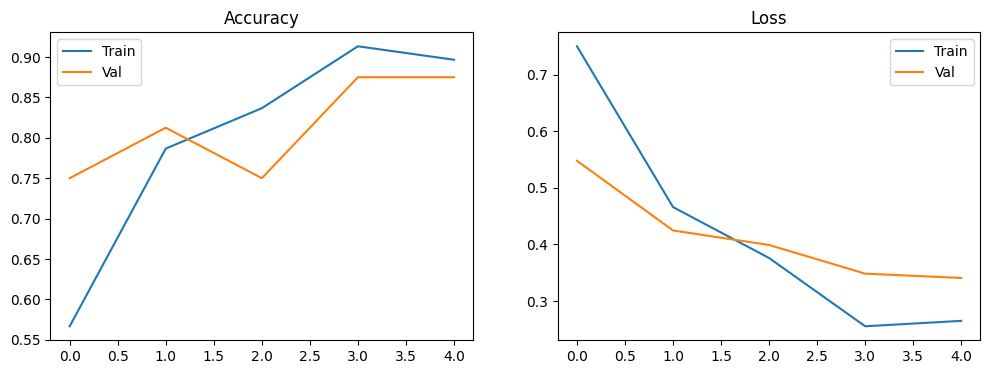

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()
plt.show()

In [41]:
model.save("cnn_model.h5")
print('success')

success
